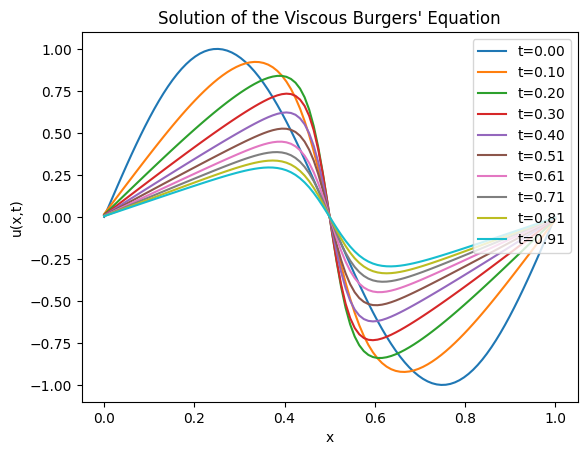

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of spatial points (including endpoints)
nu = 1 / 50  # Viscosity
L = 1  # Length of the domain
dx = L / (N - 1)  # Spatial step size
x = np.linspace(0, L, N)  # Spatial grid

# Initial condition
u0 = np.sin(2 * np.pi * x)

# Function to compute the RHS of the ODE system
def burgers_eq(t, u):
    # Central difference for u_x and u_xx
    u_x = (np.roll(u, -1) - np.roll(u, 1)) / (2 * dx)
    u_xx = (np.roll(u, -1) - 2 * u + np.roll(u, 1)) / dx**2

    # Burgers' equation
    du_dt = -u * u_x + nu * u_xx
    return du_dt

# Time interval
t_span = [0, 1]

# Solve the ODE system
sol = solve_ivp(burgers_eq, t_span, u0, t_eval=np.linspace(t_span[0], t_span[1], 100))
fig = plt.figure()
# Plotting the solution
for i in range(0, len(sol.t), 10):
    plt.plot(x, sol.y[:, i], label=f't={sol.t[i]:.2f}')

plt.title('Solution of the Viscous Burgers\' Equation')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.show()


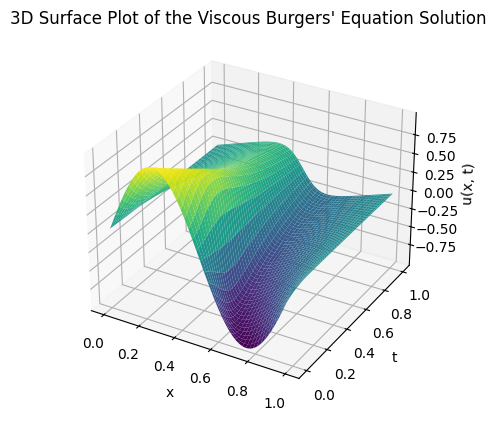

In [2]:
from mpl_toolkits.mplot3d import Axes3D

# Creating the meshgrid for x and t
T, X = np.meshgrid(sol.t, x)

# Creating the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(X, T, sol.y, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')
ax.set_title('3D Surface Plot of the Viscous Burgers\' Equation Solution')

# Show plot
plt.show()
